In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import random

In [2]:
random.seed(42)
blue_means = random.multivariate_normal([1,0], np.eye(2), size=10)
orange_means = random.multivariate_normal([0,1], np.eye(2), size=10)

In [3]:
def generate_data(population_means, n):
    data_pts = []
    for i in random.choice(list(range(len(population_means))), n):
        data_pts.append(random.multivariate_normal(population_means[i], np.eye(2)/5))
    return np.stack(data_pts)

In [4]:
blue_data = generate_data(blue_means, 100)
orange_data = generate_data(orange_means, 100)

In [5]:
def scatter_points(data, color):
    plt.scatter(data[:,0], data[:,1], c=color)

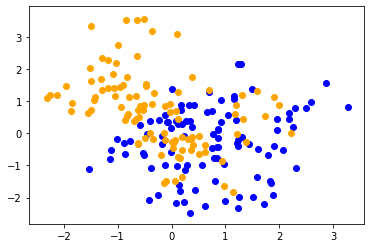

In [6]:
scatter_points(blue_data, 'blue')
scatter_points(orange_data, 'orange')

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
X = np.vstack([blue_data, orange_data])
Y = np.hstack([np.array([x]*len(blue_data)) for x in [0,1]])

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
res = knn.fit(X, Y)

In [29]:
y_train_pred = res.predict(X)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(Y, y_train_pred)

array([[91,  9],
       [13, 87]], dtype=int64)

In [32]:
print(classification_report(Y, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.91      0.87      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [23]:
def error(y_true, y_pred):
    wrong = np.sum((y_true - y_pred) != 0)
    return wrong/len(y_true)

In [33]:
error(Y, y_train_pred)

0.11

In [42]:
oos_blue = generate_data(blue_means, 5000)
oos_orange = generate_data(orange_means, 5000)
X_test = np.vstack([oos_blue, oos_orange])
Y_test = np.hstack([np.array([x]*len(oos_blue)) for x in [0,1]])

In [50]:
train_errors = []
test_errors = []
for k in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=k)
    res = knn.fit(X, Y)
    y_train_pred = res.predict(X)
    train_error = error(Y, y_train_pred)
    train_errors.append(train_error)
    y_pred = res.predict(X_test)
    test_error = error(Y_test, y_pred)
    test_errors.append(test_error)
    

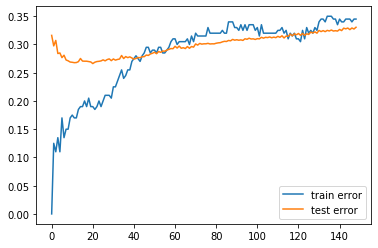

In [53]:
plt.plot(train_errors, label='train error')
plt.plot(test_errors, label='test error')
plt.legend()

In [55]:
smodel = sm.OLS(Y, sm.add_constant(X))

In [56]:
res = smodel.fit()

In [59]:
train_preds = res.predict(sm.add_constant(X))
y_train_pred = np.where(train_preds > 0.5, 1, 0)

In [64]:
test_preds = res.predict(sm.add_constant(X_test))
y_test_pred = np.where(test_preds > 0.5, 1, 0)

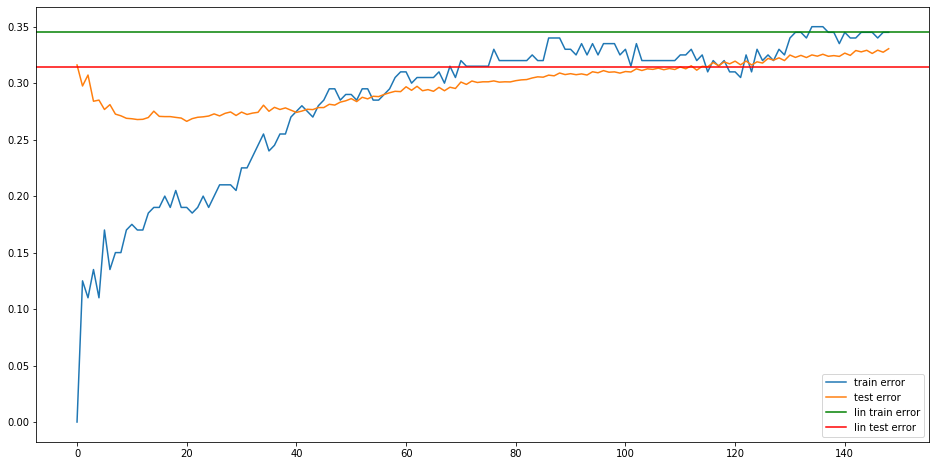

In [71]:
fig = plt.figure(figsize=(16,8))
plt.plot(train_errors, label='train error')
plt.plot(test_errors, label='test error')
plt.axhline(error(Y, y_train_pred), label='linreg train error', color = 'green')
plt.axhline(error(Y_test, y_test_pred), label='linreg test error', color = 'red')
plt.legend()